In [207]:
from qiskit import QuantumCircuit, assemble, Aer, execute
from qiskit.visualization import plot_histogram

In [208]:
pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src


  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /private/var/folders/8f/4b2m45n11v3_s7xc7ndmx0nw0000gp/T/pip-req-build-xq2je1x4
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /private/var/folders/8f/4b2m45n11v3_s7xc7ndmx0nw0000gp/T/pip-req-build-xq2je1x4
^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [209]:
from qiskit import IBMQ
IBMQ.save_account('9f8857f4b76aff1cf0d0a8f4476724e9218e4e2580c36e1997673d44aa8c14f2c0f458fe85cb1ebdcf47351ba88af4c4b0539d7db9d6d005c29153c3031c351a',overwrite=True)
provider = IBMQ.load_account()
provider

ibmqfactory.load_account:WARNING:2022-05-18 09:49:33,070: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [217]:
qc_output=QuantumCircuit(8)
qc_output.x(3)
qc_output.h(4)
qc_output.measure_all()
qc_output.draw(initial_state=True)

░ ┌─┐                     
  q_0: |0>──────░─┤M├─────────────────────
                ░ └╥┘┌─┐                  
  q_1: |0>──────░──╫─┤M├──────────────────
                ░  ║ └╥┘┌─┐               
  q_2: |0>──────░──╫──╫─┤M├───────────────
          ┌───┐ ░  ║  ║ └╥┘┌─┐            
  q_3: |0>┤ X ├─░──╫──╫──╫─┤M├────────────
          ├───┤ ░  ║  ║  ║ └╥┘┌─┐         
  q_4: |0>┤ H ├─░──╫──╫──╫──╫─┤M├─────────
          └───┘ ░  ║  ║  ║  ║ └╥┘┌─┐      
  q_5: |0>──────░──╫──╫──╫──╫──╫─┤M├──────
                ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
  q_6: |0>──────░──╫──╫──╫──╫──╫──╫─┤M├───
                ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
  q_7: |0>──────░──╫──╫──╫──╫──╫──╫──╫─┤M├
                ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 0 8/═════════╩══╩══╩══╩══╩══╩══╩══╩═
                   0  1  2  3  4  5  6  7

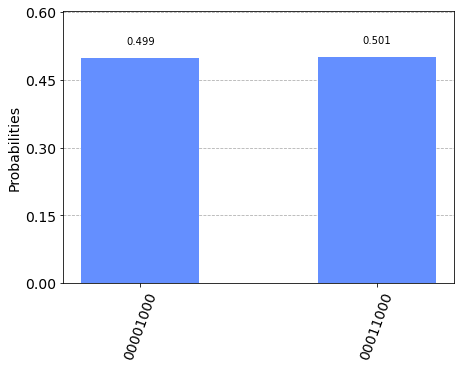

In [218]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)

In [219]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

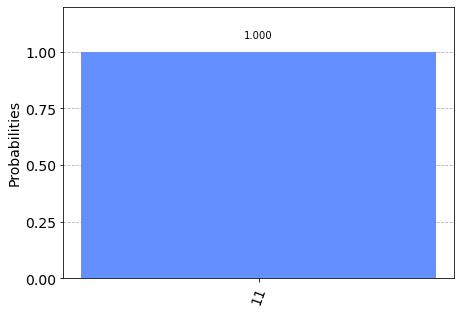

In [220]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

In [221]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw()

┌───┐ ░            ░       
q_0: ┤ X ├─░───■────────░───────
     ├───┤ ░   │        ░       
q_1: ┤ X ├─░───┼────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░─┤M├───
           ░ └───┘└───┘ ░ └╥┘┌─┐
q_3: ──────░────────────░──╫─┤M├
           ░            ░  ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

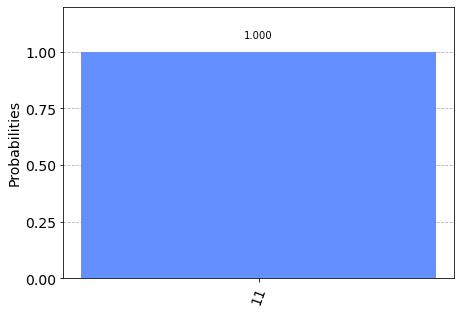

In [222]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

# HALF ADDER



In [223]:

from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister,assemble,Aer
from qiskit.visualization import plot_histogram


cr= ClassicalRegister(2,'o')
qr= QuantumRegister(4,'i')

qc=QuantumCircuit(qr,cr)
qc.x(1)
#qc.x(0)
qc.barrier()
qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3)
qc.barrier()

qc.measure(2,0)
qc.measure(3,1)
qc.draw()


░                 ░       
i_0: ──────░───■─────────■───░───────
     ┌───┐ ░   │         │   ░       
i_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
i_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
i_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
o: 2/═══════════════════════════╩══╩═
                                0  1

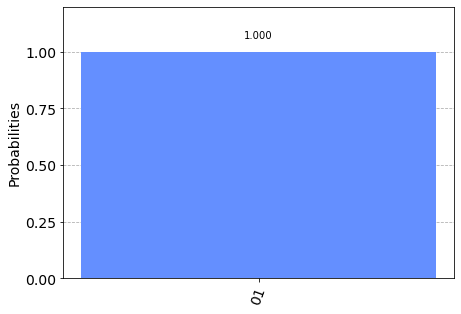

In [224]:

sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

# FULL ADDER

In [225]:



q = QuantumRegister(5,'q')
c = ClassicalRegister(2,'c')

circuit = QuantumCircuit(q,c)
#Input can cannot
circuit.x(q[0])
circuit.x(q[2])
circuit.cx(q[0],q[3])
circuit.cx(q[1],q[3])
circuit.cx(q[2],q[3])
circuit.ccx(q[0],q[1],q[4])
circuit.ccx(q[0],q[2],q[4])
circuit.ccx(q[1],q[2],q[4])

circuit.measure(q[3],c[0])
circuit.measure(q[4],c[1])
circuit.draw(initial_state=True)


┌───┐                                    
q_0: |0>┤ X ├──■──────────────■────■─────────────
        └───┘  │              │    │             
q_1: |0>───────┼────■─────────■────┼───────■─────
        ┌───┐  │    │         │    │       │     
q_2: |0>┤ X ├──┼────┼────■────┼────■───────■─────
        └───┘┌─┴─┐┌─┴─┐┌─┴─┐  │    │  ┌─┐  │     
q_3: |0>─────┤ X ├┤ X ├┤ X ├──┼────┼──┤M├──┼─────
             └───┘└───┘└───┘┌─┴─┐┌─┴─┐└╥┘┌─┴─┐┌─┐
q_4: |0>────────────────────┤ X ├┤ X ├─╫─┤ X ├┤M├
                            └───┘└───┘ ║ └───┘└╥┘
 c: 0 2/═══════════════════════════════╩═══════╩═
                                       0       1

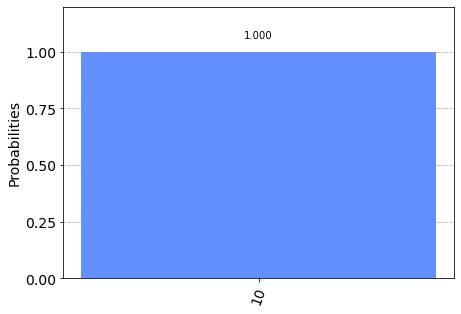

In [226]:

sim = Aer.get_backend('aer_simulator') 
result = sim.run(circuit).result()
counts = result.get_counts()
plot_histogram(counts)

# Create a Quantum Circuit acting
# on the q register

In [227]:



circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control
# qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the
# classical bits
circuit.measure([0,1],[0,1])

# circuit.measure_all()
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm
# simulator
job = execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Return counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw()



Total count for 00 and 11 are: {'00': 490, '11': 510}


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

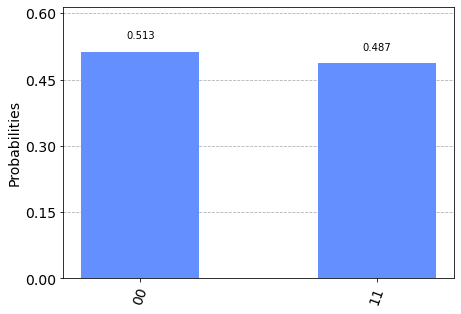

In [228]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(circuit).result()
counts = result.get_counts()
plot_histogram(counts)

# SAVING STATE OF VECTORS ... INITIALIZING A QUIBIT WITH STATE 1


In [229]:

qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.save_statevector()   # Tell simulator to save statevector
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result
print(result.get_statevector())
qc.measure_all()
qc.draw()

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


┌─────────────────┐ ░  ░ ┌─┐
     q: ┤ Initialize(0,1) ├─░──░─┤M├
        └─────────────────┘ ░  ░ └╥┘
meas: 1/══════════════════════════╩═
                                  0

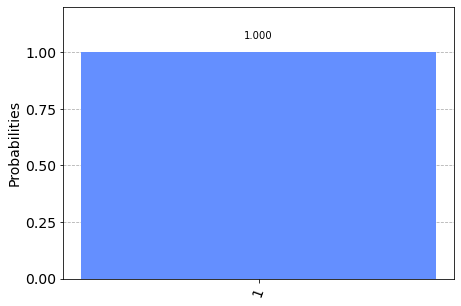

In [230]:
qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

#  IMAGINARY NUMBERS



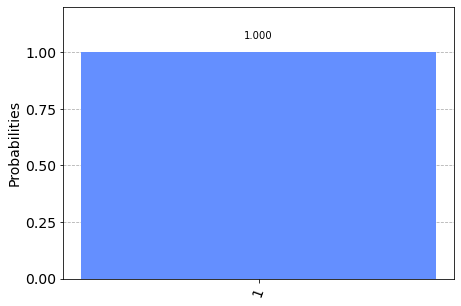

In [231]:

qobj = assemble(qc)
results = sim.run(qobj).result().get_counts()
plot_histogram(results)

In [232]:
initial_state = [1j/sqrt(3),sqrt(2/3)]  # Define state |q_0>


qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialize the 0th qubit in the state `initial_state`
qc.save_statevector() # Save statevector
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() # Execute the circuit
print(state)  

Statevector([0.        +0.57735027j, 0.81649658+0.j        ],
            dims=(2,))


In [233]:
from numpy import sqrt 

sqrt(2)

1.4142135623730951

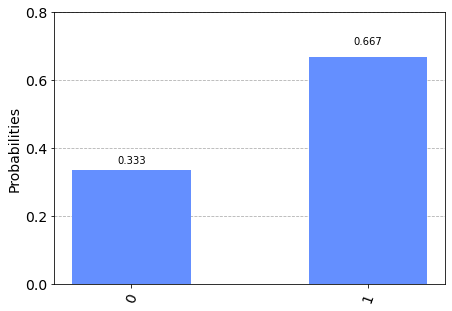

In [234]:
qobj = assemble(qc)
results = sim.run(qobj).result().get_counts()
plot_histogram(results)

# PAULI GATE

In [235]:
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt

In [236]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

┌───┐
q: ┤ X ├
   └───┘

In [237]:
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
#plot_bloch_multivector(state)

In [238]:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = [1/sqrt(2), -1/sqrt(2)]
# Initialize our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
#qc.measure_all()

qc.save_statevector() # Save statevector
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() # Execute the circuit
print(state)  
qc.draw()

Statevector([0.+0.000000e+00j, 1.-6.123234e-17j],
            dims=(2,))


┌──────────────────────────────┐┌───┐┌─┐ ░ 
  q: ┤ Initialize(0.70711,-0.70711) ├┤ H ├┤M├─░─
     └──────────────────────────────┘└───┘└╥┘ ░ 
c: 1/══════════════════════════════════════╩════
                                           0

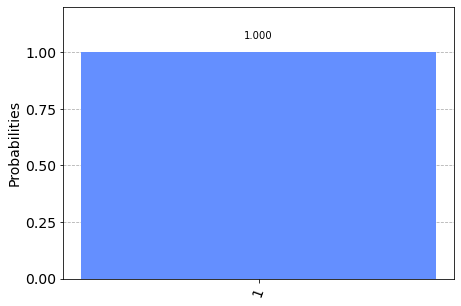

In [239]:
qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = sim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output on measurement of state vector

In [240]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h+p')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

# R / P gate

In [241]:

qc = QuantumCircuit(1)
qc.p(pi/4, 0)
qc.draw()

┌────────┐
q: ┤ P(π/4) ├
   └────────┘

# S gate

In [242]:
qc = QuantumCircuit(1)
qc.s(0)   # Apply S-gate to qubit 0
qc.sdg(0) # Apply Sdg-gate to qubit 0
qc.draw()

┌───┐┌─────┐
q: ┤ S ├┤ Sdg ├
   └───┘└─────┘

# T gate

In [243]:
qc = QuantumCircuit(1)
qc.t(0)   # Apply T-gate to qubit 0
qc.tdg(0) # Apply Tdg-gate to qubit 0
qc.draw()

┌───┐┌─────┐
q: ┤ T ├┤ Tdg ├
   └───┘└─────┘

# MULTI QUBIT 

In [244]:
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [245]:
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

In [246]:
# Let's see the result
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()


In [247]:
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevqector} = ")

<IPython.core.display.Latex object>

# Tensor or Kronecker Product of X and H 

In [248]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

In [249]:
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()

In [250]:

from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

# Tensor or Kronecker Product of I and H 

In [251]:
qc = QuantumCircuit(2)
qc.x(1)
qc.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘

In [252]:
# Simulate the unitary
usim = Aer.get_backend('qasm_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary1 = usim.run(qobj).result().get_unitary()
# Display the results:
array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

# Bell State


In [253]:
qc = QuantumCircuit(2)
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [254]:
# Let's get the result:
qc.save_statevector()
qobj = assemble(qc)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")


<IPython.core.display.Latex object>

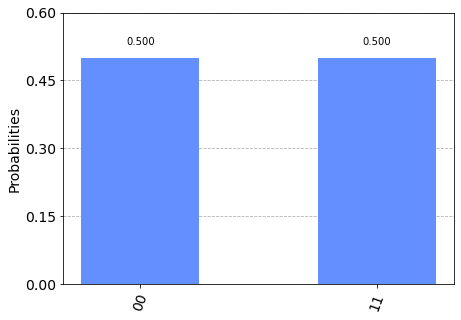

In [255]:
plot_histogram(result.get_counts())

# 2.3

In [256]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex

In [257]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ H ├┤ X ├
     └───┘└───┘

In [258]:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))

<IPython.core.display.Latex object>

In [259]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw()
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))

<IPython.core.display.Latex object>

## Controlled T gate

In [260]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
display(qc.draw())
# See Results:
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Controlled-T} = \n")

q_0: ─■───────
      │P(π/4) 
q_1: ─■───────

<IPython.core.display.Latex object>

Controlled-T|1+⟩ = =|1⟩⊗1/√2(|0⟩+eiπ/4|1⟩)


In [261]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
# Add Controlled-T
qc.cp(pi/4, 0, 1)
display(qc.draw())
# See Results:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, prefix="\\text{Answer} = \n")

┌───┐         
q_0: ┤ H ├─■───────
     ├───┤ │P(π/4) 
q_1: ┤ X ├─■───────
     └───┘

<IPython.core.display.Latex object>

# Controlled Z

In [262]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate
from math import pi
qc = QuantumCircuit(2)
c = 0
t = 1

In [263]:
# a controlled-Z
qc = QuantumCircuit(2)

qc.cz(c,t)
qc.draw()

q_0: ─■─
      │ 
q_1: ─■─

In [264]:
qc = QuantumCircuit(2)
# also a controlled-Z
qc.h(t)
qc.cx(c,t)
qc.h(t)
qc.draw()

q_0: ───────■───────
     ┌───┐┌─┴─┐┌───┐
q_1: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘

# Controlled Y


In [265]:
qc = QuantumCircuit(2)
# a controlled-Y
qc.sdg(t)
qc.cx(c,t)
qc.s(t)
qc.draw()


q_0: ─────────■───────
     ┌─────┐┌─┴─┐┌───┐
q_1: ┤ Sdg ├┤ X ├┤ S ├
     └─────┘└───┘└───┘

In [266]:
# a controlled-y
qc = QuantumCircuit(2)

qc.cy(c,t)
qc.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ Y ├
     └───┘

# Swapping Qubits

In [267]:
a = 0
b = 1

In [268]:
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.swap(a,b)
qc.draw()

q_0: ─X─
      │ 
q_1: ─X─

In [269]:
qc = QuantumCircuit(2)
# swap a 1 from a to b
qc.cx(a,b) # copies 1 from a to b
qc.cx(b,a) # uses the 1 on b to rotate the state of a to 0
qc.draw()

┌───┐
q_0: ──■──┤ X ├
     ┌─┴─┐└─┬─┘
q_1: ┤ X ├──■──
     └───┘

In [270]:
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.x(b)
qc.cx(a,b)
qc.cx(b,a)
qc.cx(a,b)
qc.measure_all()

qc.draw()

┌───┐      ░ ┌─┐   
   q_0: ───────■──┤ X ├──■───░─┤M├───
        ┌───┐┌─┴─┐└─┬─┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ┤ X ├┤ X ├──■──┤ X ├─░──╫─┤M├
        └───┘└───┘     └───┘ ░  ║ └╥┘
meas: 2/════════════════════════╩══╩═
                                0  1

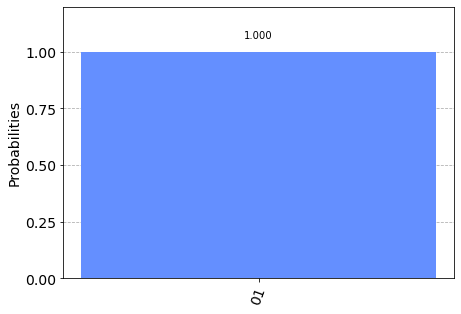

In [271]:
qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = sim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output on measurement of state vector

# Toffoli Gate

In [272]:
qc = QuantumCircuit(3)
a = 0
b = 1
t = 2
# Toffoli with control qubits a and b and target t
qc.ccx(a,b,t)
qc.draw()

q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘

# Deutsch-Jozsa Algorithm


In [1]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
# set the length of the n-bit input string. 
n = 3

In [3]:
# set the length of the n-bit input string. 
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3:

# Balanced Oracle

In [4]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()

┌───┐ ░                 ░ ┌───┐
q_0: ┤ X ├─░───■─────────────░─┤ X ├
     └───┘ ░   │             ░ └───┘
q_1: ──────░───┼────■────────░──────
     ┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ X ├─░───┼────┼────■───░─┤ X ├
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘ ░

In [5]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit += balanced_oracle

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw()

/var/folders/8f/4b2m45n11v3_s7xc7ndmx0nw0000gp/T/ipykernel_5847/460382824.py:12: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  dj_circuit += balanced_oracle


┌───┐┌───┐ ░                 ░ ┌───┐┌───┐ ░ ┌─┐      
q_0: ┤ H ├┤ X ├─░───■─────────────░─┤ X ├┤ H ├─░─┤M├──────
     ├───┤└───┘ ░   │             ░ ├───┤└───┘ ░ └╥┘┌─┐   
q_1: ┤ H ├──────░───┼────■────────░─┤ H ├──────░──╫─┤M├───
     ├───┤┌───┐ ░   │    │        ░ ├───┤┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├┤ H ├─░──╫──╫─┤M├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘└───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░────────────░──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░            ░  ║  ║  ║ 
c: 3/═════════════════════════════════════════════╩══╩══╩═
                                                  0  1  2

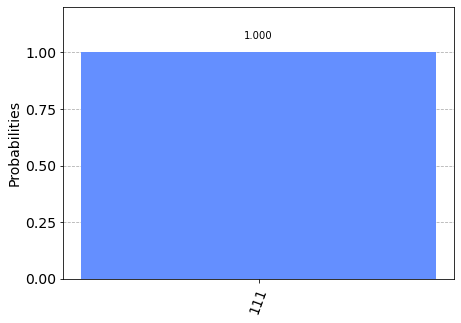

In [6]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(dj_circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

In [7]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

In [8]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

In [9]:
n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw()

┌───┐     ┌─────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├─────────
     ├───┤     │         │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1        ├┤ H ├─╫─┤M├──────
     ├───┤     │         │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 Oracle ├┤ H ├─╫──╫─┤M├───
     ├───┤     │         │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3        ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4        ├──────╫──╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║  ║ 
c: 4/═══════════════════════════╩══╩══╩══╩═
                                0  1  2  3

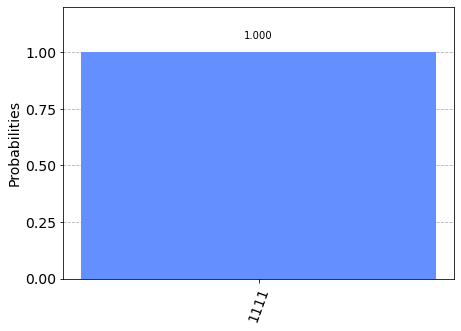

In [10]:
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
qobj = assemble(transpiled_dj_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

In [11]:
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_belem


# Bernstein-Vazirani Algorithm

In [284]:
# initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble


%matplotlib inline
# import basic plot tools
from qiskit.visualization import plot_histogram

In [285]:
s = '11100'   # the hidden binary string
n=len(s)

In [286]:
# We need a circuit with n qubits, plus one auxiliary qubit
# Also need n classical bits to write the output to
bv_circuit = QuantumCircuit(n+1, n)

# put auxiliary in state |->
bv_circuit.h(n)
bv_circuit.z(n)

# Apply Hadamard gates before querying the oracle
for i in range(n):
    bv_circuit.h(i)
    
# Apply barrier 
bv_circuit.barrier()

# Apply the inner-product oracle
s = s[::-1] # reverse s to fit qiskit's qubit ordering
for q in range(n):
    if s[q] == '0':
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q, n)
        
# Apply barrier 
bv_circuit.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(n):
    bv_circuit.h(i)

# Measurement
for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw()

┌───┐      ░ ┌───┐           ░ ┌───┐┌─┐            
q_0: ┤ H ├──────░─┤ I ├───────────░─┤ H ├┤M├────────────
     ├───┤      ░ ├───┤           ░ ├───┤└╥┘┌─┐         
q_1: ┤ H ├──────░─┤ I ├───────────░─┤ H ├─╫─┤M├─────────
     ├───┤      ░ └───┘           ░ ├───┤ ║ └╥┘┌─┐      
q_2: ┤ H ├──────░───■─────────────░─┤ H ├─╫──╫─┤M├──────
     ├───┤      ░   │             ░ ├───┤ ║  ║ └╥┘┌─┐   
q_3: ┤ H ├──────░───┼────■────────░─┤ H ├─╫──╫──╫─┤M├───
     ├───┤      ░   │    │        ░ ├───┤ ║  ║  ║ └╥┘┌─┐
q_4: ┤ H ├──────░───┼────┼────■───░─┤ H ├─╫──╫──╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ║  ║  ║  ║ └╥┘
q_5: ┤ H ├┤ Z ├─░─┤ X ├┤ X ├┤ X ├─░───────╫──╫──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░       ║  ║  ║  ║  ║ 
c: 5/═════════════════════════════════════╩══╩══╩══╩══╩═
                                          0  1  2  3  4

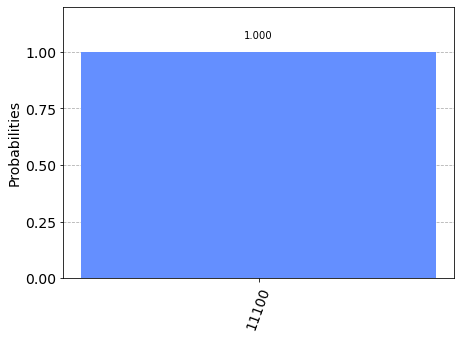

In [287]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(bv_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

# SIMON 

In [288]:
# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble

# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

In [289]:
b = '101'

n = len(b)
simon_circuit = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit.h(range(n))    
    
# Apply barrier for visual separation
simon_circuit.barrier()

simon_circuit += simon_oracle(b)

# Apply barrier for visual separation
simon_circuit.barrier()

# Apply Hadamard gates to the input register
simon_circuit.h(range(n))

# Measure qubits
simon_circuit.measure(range(n), range(n))
simon_circuit.draw()

/var/folders/8f/4b2m45n11v3_s7xc7ndmx0nw0000gp/T/ipykernel_2112/2714027207.py:12: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  simon_circuit += simon_oracle(b)


┌───┐ ░                           ░ ┌───┐┌─┐      
q_0: ┤ H ├─░───■──────────────■────■───░─┤ H ├┤M├──────
     ├───┤ ░   │              │    │   ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├─░───┼────■─────────┼────┼───░─┤ H ├─╫─┤M├───
     ├───┤ ░   │    │         │    │   ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─░───┼────┼────■────┼────┼───░─┤ H ├─╫──╫─┤M├
     └───┘ ░ ┌─┴─┐  │    │  ┌─┴─┐  │   ░ └───┘ ║  ║ └╥┘
q_3: ──────░─┤ X ├──┼────┼──┤ X ├──┼───░───────╫──╫──╫─
           ░ └───┘┌─┴─┐  │  └───┘  │   ░       ║  ║  ║ 
q_4: ──────░──────┤ X ├──┼─────────┼───░───────╫──╫──╫─
           ░      └───┘┌─┴─┐     ┌─┴─┐ ░       ║  ║  ║ 
q_5: ──────░───────────┤ X ├─────┤ X ├─░───────╫──╫──╫─
           ░           └───┘     └───┘ ░       ║  ║  ║ 
c: 3/══════════════════════════════════════════╩══╩══╩═
                                               0  1  2

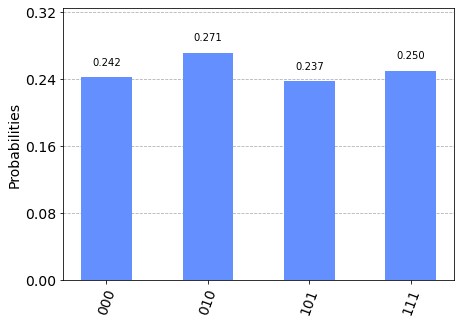

In [290]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(simon_circuit, shots=shots)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [291]:
# Calculate the dot product of the results
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

print('b = ' + b)
for z in counts:
    print( '{}.{} = {} (mod 2) ({:.1f}%)'.format(b, z, bdotz(b,z), counts[z]*100/shots))

b = 101
101.111 = 0 (mod 2) (25.0%)
101.101 = 0 (mod 2) (23.7%)
101.000 = 0 (mod 2) (24.2%)
101.010 = 0 (mod 2) (27.1%)


In [292]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
#IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

# Execute and monitor the job
from qiskit.tools.monitor import job_monitor
shots = 1024
transpiled_simon_circuit = transpile(simon_circuit, backend, optimization_level=3)
qobj = assemble(transpiled_simon_circuit, shots=shots)
job = backend.run(qobj)
job_monitor(job, interval=2)

least busy backend:  ibmq_belem


TranspilerError: 'Number of qubits (6) in circuit-966 is greater than maximum (5) in the coupling_map'

In [ ]:
# Get results and plot counts
device_counts = job.result().get_counts()
plot_histogram(device_counts)

In [17]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

In [18]:
# set the length of the n-bit input string. 
n = 3

In [19]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()

┌───┐ ░                 ░ ┌───┐
q_0: ┤ X ├─░───■─────────────░─┤ X ├
     └───┘ ░   │             ░ └───┘
q_1: ──────░───┼────■────────░──────
     ┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ X ├─░───┼────┼────■───░─┤ X ├
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘ ░

In [20]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit += balanced_oracle

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw()

/var/folders/8f/4b2m45n11v3_s7xc7ndmx0nw0000gp/T/ipykernel_5847/460382824.py:12: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  dj_circuit += balanced_oracle


┌───┐┌───┐ ░                 ░ ┌───┐┌───┐ ░ ┌─┐      
q_0: ┤ H ├┤ X ├─░───■─────────────░─┤ X ├┤ H ├─░─┤M├──────
     ├───┤└───┘ ░   │             ░ ├───┤└───┘ ░ └╥┘┌─┐   
q_1: ┤ H ├──────░───┼────■────────░─┤ H ├──────░──╫─┤M├───
     ├───┤┌───┐ ░   │    │        ░ ├───┤┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├┤ H ├─░──╫──╫─┤M├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘└───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░────────────░──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░            ░  ║  ║  ║ 
c: 3/═════════════════════════════════════════════╩══╩══╩═
                                                  0  1  2

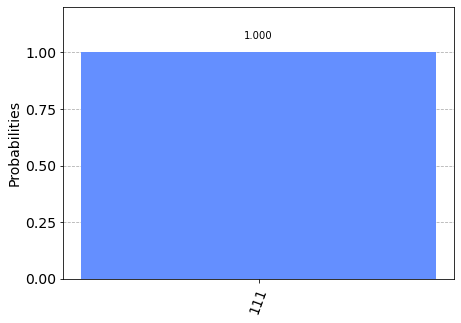

In [21]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(dj_circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)